### Author : Manish Bendale
<b>Topic:</b> OpenCV and Python K-Means Color Clustering

In [32]:

## import required packages
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
import webcolors

In [54]:

def load_image(image_name):
    ## load the image from the location.
    image = cv2.imread(image_name)
    ## This image will be in BGR fromate, we will convert this into RGB.
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ## Display the image using matplotlib
    plt.figure()
    plt.axis("off")
    plt.title("Input Image")
    plt.imshow(image)
    return image

def image2list_of_pixel(image):
    ## we want to generate k clusters from n data points. 
    ## Our image of MxN shape is our data points for k mean clustering.
    ## So, we need to re-shape our image to be a list of pixels, instead of MxN matrix of pixels
    image = image.reshape((image.shape[0]*image.shape[1], 3))
    #print(image.shape)
    return image

def KMean_Clustering(image, cluster):
    ## Apply KMean from sklearn
    clt = KMeans(n_clusters = cluster)
    clt.fit(image)
    #print(clt.labels_)
    #print(clt.cluster_centers_)
    return clt

def centroid_histogram(clt):
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    hist,_ = np.histogram(clt.labels_, bins = numLabels)
    # Normalize the histogram
    hist = hist.astype("float")
    hist/=hist.sum()
    return hist

def plot_colors(hist, centroids):
    ## pip install webcolors==1.3
    # initialize the bar chart representing the relative frequency
    # of each of the colors
    bar = np.zeros((50, 300, 3), dtype = "uint8")
    startX = 0
    # loop over the percentage of each cluster and the color of
    # each cluster
    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
            color.astype("uint8").tolist(), -1)
        startX = endX
        print("Percentage of color :",percent)
        print("Pixel value of color :",color)
        print()
    # return the bar chart
    return bar

def Apply_Color_Clustring(image_name, cluster):
    ## Load image
    image = load_image(image_name)
    ## Covert image matrix to list of pixel
    image = image2list_of_pixel(image)
    ## Apply KMean Clustering
    clt = KMean_Clustering(image, cluster)
    # build a histogram of clusters and then create a figure
    # representing the number of pixels labeled to each color
    hist = centroid_histogram(clt)
    bar = plot_colors(hist, clt.cluster_centers_)
    # show our color bart
    plt.figure()
    plt.axis("off")
    plt.title("Cluster of Colors")
    plt.imshow(bar)
    plt.show()

Percentage of color : 0.33830088322841945
Pixel value of color : [227.66105281 231.82761117 184.0550772 ]

Percentage of color : 0.4017261991899673
Pixel value of color : [48.21017633 48.93626698 36.85069208]

Percentage of color : 0.2599729175816132
Pixel value of color : [123.41402419 129.15970399  97.80580969]



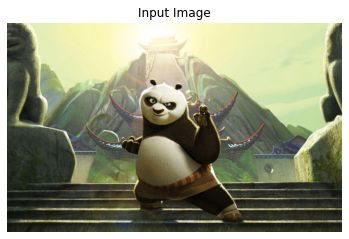

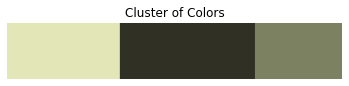

In [55]:
image_name = "panda.jpeg"
## Provide number of cluster
cluster = 3
## Apply Clustring for color clustring
Apply_Color_Clustring(image_name, cluster)

Percentage of color : 0.11484375
Pixel value of color : [178.21341671 171.32279704  36.32177374]

Percentage of color : 0.2860546875
Pixel value of color : [210.79475266 218.55798488 219.05192676]

Percentage of color : 0.5991015625
Pixel value of color : [66.36524723 82.03313717  3.33955832]



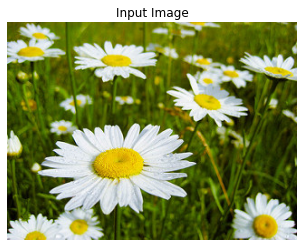

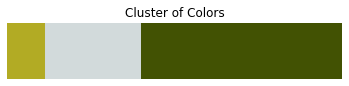

In [56]:
image_name = "flower-001.jpg"
## Provide number of cluster
cluster = 3
## Apply Clustring for color clustring
Apply_Color_Clustring(image_name, cluster)